# PyCaret y AutoML
Actividad Lección 2 || Programación Python para Big Data

Objetivos:
* Aprender más sobre PyCaret y AutoML
* Subir una nueva predicción a Kaggle
* Fomentar la proactividad del alumno

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 09/09/2022

# Tabla de Contenidos
- [1.- Clasificación Binaria - Titanic Dataset - PyCaret](#1-clasificacion-binaria)
 * [1.1.- Step 0: Instalación de PyCaret](#101-instalacion)
 * [1.2.- Step 1: Importamos nuestras Dependencias](#102-dependencias)
 * [1.3.- Step 2: Importamos el Titanic Dataset](#103-titanic)
 * [1.4.- Step 3: Setup()](#104-setup)
 * [1.5.- Step 4: Compare_Models()](#105-compare-models)
 * [1.6.- Step 5: create_model()](#106-create-models)
 * [1.7.- Step 6: tune_model() para los 2-3 mejores](#107-tune-model)
 * [1.8.- Step 7: plot_model() para el mejor](#108-plot-model)
 * [1.9.- Step 8: evaluate_model() para el mejor](#109-evaluate-model)
 * [1.10.- Step 9: Nos vamos a test.csv](#110-test)
 * [1.11.- Step 10: Hacemos predicciones con el mejor](#111-predicciones)
 * [1.12.- Step 11: Submissions](#112-submissions)
 * [1.13.- Step 12: Creo el archivo csv para Kaggle](#113-kaggle)
- [2.- Opinion respecto al AutoML](#2-automl)
 * [2.1.- ¿Te costó esfuerzo aprender el presente tema?](#21-esfuerzo)
 * [2.2.- ¿Qué te ha llamado la atención de PyCaret?](#22-pycaret)
 * [2.3.-  ¿Notas que es más simple haciéndolo así que como se hizo en Fundamentos de Big Data? Si opinas diferente la respuesta no es correcta/incorrecta, siempre y cuando argumentes tu respuesta.](#23-simple)
 * [2.4.- Busca más herramientas AutoML que existan y enumera alguna (simplemente queremos que te familiarices con ello, nada más).](#24-otros)
- [3.- La curva ROC y el AUC](#3-roc-auc)
 * [3.1.- ¿Qué es la curva ROC?](#31-roc)
 * [3.2.- ¿Qué es el AUC?](#32-auc)
- [4.- Confusion Matrix o Matríz de Confusión](#4-confusion-matrix)
- [5.- Envía tu predicción a Kaggle](#5-resultados-kaggle)

## 1.- Clasificación Binaria - Titanic Dataset - PyCaret <a class="anchor" id="1-clasificacion-binaria"></a>

### 1.1.- Step 0: Instalación de PyCaret <a class="anchor" id="101-instalacion"></a>

In [1]:
# !pip install pycaret
# Instalarlo ANTES de abrir Jupyter, directamente en el "cmd"
# cmd: pip install pycaret
# (es lo más rápido)

### 1.2.- Step 1: Importamos nuestras Dependencias <a class="anchor" id="102-dependencias"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importamos todo de Pycaret clasificación
from pycaret.classification import *

### 1.3.- Step 2: Importamos el Titanic Dataset <a class="anchor" id="103-titanic"></a>

In [4]:
# Titanic dataset

# train.csv 
# test.csv
# gender_submission.csv 

In [5]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.4.- Step 3: setup() <a class="anchor" id="104-setup"></a>

In [6]:
# En este caso concreto, no haríamos el drop()
# Las columnas que no queremos las ignoramos con ignore_features
# La data es el propio dataframe obtenido con train.csv
# La columna (y) es "Survived"
# Si estamos de acuerdo con los tipos de datos, click en Enter.
# (Cuando ejecutamos la celda, debemos esperar y después hacer click en Enter)
# Pclass podría ser "ordinal", pero lo podemos dejar como "categorica"
# "SibSp" y "Parch" son categoricas con un limitado numero de posibles valores
# pudimos considerarlas (quizá) como numéricas, no obstante
clf = setup(df, target = 'Survived', ignore_features=["Name", "Ticket", "PassengerId"])

,Description,Value
0,session_id,2432
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


### 1.5.- Step 4: compare_models() <a class="anchor" id="105-compare-models"></a>

In [7]:
# k-fold cross validation
# este concepto mejor esperar a Machine Learning por la explicación tecnica
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8233,0.8499,0.6634,0.8392,0.7359,0.6068,0.6200,0.0320
lightgbm,Light Gradient Boosting Machine,0.8041,0.8252,0.7024,0.7653,0.7300,0.5770,0.5805,0.0120
ridge,Ridge Classifier,0.8010,0.0000,0.7024,0.7589,0.7246,0.5700,0.5751,0.0030
rf,Random Forest Classifier,0.7978,0.8230,0.7063,0.7509,0.7235,0.5648,0.5691,0.0640
lda,Linear Discriminant Analysis,0.7977,0.8338,0.6938,0.7574,0.7204,0.5629,0.5676,0.0060
lr,Logistic Regression,0.7962,0.8425,0.6719,0.7675,0.7088,0.5543,0.5630,0.3990
ada,Ada Boost Classifier,0.7817,0.8247,0.7018,0.7214,0.7050,0.5329,0.5381,0.0270
et,Extra Trees Classifier,0.7737,0.8092,0.6893,0.7079,0.6949,0.5157,0.5190,0.0550
dt,Decision Tree Classifier,0.7528,0.7383,0.6937,0.6712,0.6792,0.4790,0.4820,0.0040
knn,K Neighbors Classifier,0.7174,0.7172,0.5569,0.6446,0.5927,0.3797,0.3851,0.0110


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2432, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 1.6.- Step 5: create_model() <a class="anchor" id="106-create-models"></a>

In [8]:
# Mejor en mi caso = en mi caso GBC

# Los parámetros que muestra serán explicados en Machine Learning
# de momento nos fijaremos en "Accuracy" (ya visto) y en "AUC"

In [9]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.7954,0.5417,0.9286,0.6842,0.5610,0.6028
1,0.8254,0.8499,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.9048,0.9215,0.8333,0.9091,0.8696,0.7948,0.7967
3,0.8387,0.8701,0.7917,0.7917,0.7917,0.6601,0.6601
4,0.8065,0.8410,0.5833,0.8750,0.7000,0.5654,0.5908
5,0.8065,0.8043,0.6087,0.8235,0.7000,0.5618,0.5758
6,0.7742,0.8021,0.5217,0.8000,0.6316,0.4790,0.5017
7,0.8871,0.8846,0.7391,0.9444,0.8293,0.7468,0.7593
8,0.7903,0.8829,0.6522,0.7500,0.6977,0.5384,0.5415


In [10]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.7628,0.6250,0.7895,0.6977,0.5442,0.5528
1,0.7778,0.8355,0.6667,0.7273,0.6957,0.5212,0.5224
2,0.8571,0.8900,0.7917,0.8261,0.8085,0.6947,0.6951
3,0.8065,0.8339,0.7917,0.7308,0.7600,0.5983,0.5996
4,0.7258,0.8081,0.5833,0.6667,0.6222,0.4085,0.4108
5,0.7903,0.8027,0.6957,0.7273,0.7111,0.5467,0.5470
6,0.8387,0.7915,0.6522,0.8824,0.7500,0.6349,0.6507
7,0.8548,0.8467,0.7391,0.8500,0.7907,0.6804,0.6843
8,0.8226,0.8551,0.7391,0.7727,0.7556,0.6164,0.6168


In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.7965,0.6250,0.7143,0.6667,0.4828,0.4854
1,0.7778,0.8419,0.6667,0.7273,0.6957,0.5212,0.5224
2,0.8095,0.8707,0.7500,0.7500,0.7500,0.5962,0.5962
3,0.8226,0.8536,0.7917,0.7600,0.7755,0.6289,0.6293
4,0.7742,0.8114,0.7083,0.7083,0.7083,0.5241,0.5241
5,0.8065,0.8027,0.7391,0.7391,0.7391,0.5853,0.5853
6,0.8226,0.7776,0.5652,0.9286,0.7027,0.5867,0.6234
7,0.8387,0.8473,0.8261,0.7600,0.7917,0.6605,0.6620
8,0.7581,0.8356,0.6522,0.6818,0.6667,0.4769,0.4772


### 1.7.- Step 6: tune_model() para los 2-3 mejores <a class="anchor" id="107-tune-model"></a>

In [12]:
# gbc optimizado con AUC
tune_gbc_auc = tune_model(gbc, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8520,0.5417,0.8125,0.6500,0.4966,0.5185
1,0.7778,0.8312,0.5833,0.7778,0.6667,0.5051,0.5168
2,0.8889,0.9108,0.7917,0.9048,0.8444,0.7586,0.7627
3,0.7903,0.8394,0.7917,0.7037,0.7451,0.5681,0.5709
4,0.8226,0.8690,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.8065,0.7865,0.6522,0.7895,0.7143,0.5699,0.5759
6,0.7742,0.7960,0.5217,0.8000,0.6316,0.4790,0.5017
7,0.8548,0.8818,0.7391,0.8500,0.7907,0.6804,0.6843
8,0.7581,0.8606,0.5217,0.7500,0.6154,0.4471,0.4628


In [13]:
# gbc optimizado con Accuracy
tune_gbc_acc = tune_model(gbc, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8520,0.5417,0.8125,0.6500,0.4966,0.5185
1,0.7778,0.8312,0.5833,0.7778,0.6667,0.5051,0.5168
2,0.8889,0.9108,0.7917,0.9048,0.8444,0.7586,0.7627
3,0.7903,0.8394,0.7917,0.7037,0.7451,0.5681,0.5709
4,0.8226,0.8690,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.8065,0.7865,0.6522,0.7895,0.7143,0.5699,0.5759
6,0.7742,0.7960,0.5217,0.8000,0.6316,0.4790,0.5017
7,0.8548,0.8818,0.7391,0.8500,0.7907,0.6804,0.6843
8,0.7581,0.8606,0.5217,0.7500,0.6154,0.4471,0.4628


In [14]:
# lightgbm optimizado con AUC
tune_lightgbm_auc = tune_model(lightgbm, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.8365,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6190,0.8446,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6190,0.9092,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6129,0.8514,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6129,0.8629,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6290,0.7915,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6290,0.7993,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6290,0.8679,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6290,0.8863,0.0000,0.0000,0.0000,0.0000,0.0000


In [15]:
# lightgbm optimizado con Accuracy
tune_lightgbm_acc = tune_model(lightgbm, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.7596,0.5833,0.8750,0.7000,0.5685,0.5936
1,0.7937,0.8504,0.6667,0.7619,0.7111,0.5517,0.5547
2,0.9048,0.9049,0.8333,0.9091,0.8696,0.7948,0.7967
3,0.7903,0.8624,0.7917,0.7037,0.7451,0.5681,0.5709
4,0.7581,0.8344,0.6250,0.7143,0.6667,0.4781,0.4807
5,0.7419,0.7915,0.5652,0.6842,0.6190,0.4266,0.4310
6,0.8548,0.8060,0.6522,0.9375,0.7692,0.6683,0.6917
7,0.8387,0.8534,0.7826,0.7826,0.7826,0.6544,0.6544
8,0.8065,0.8863,0.6522,0.7895,0.7143,0.5699,0.5759


In [16]:
# rf optimizado con AUC
tune_rf_auc = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8269,0.5417,0.8125,0.6500,0.4966,0.5185
1,0.7619,0.8296,0.6250,0.7143,0.6667,0.4828,0.4854
2,0.8730,0.9087,0.8333,0.8333,0.8333,0.7308,0.7308
3,0.7903,0.8854,0.8333,0.6897,0.7547,0.5744,0.5823
4,0.7419,0.8388,0.6667,0.6667,0.6667,0.4561,0.4561
5,0.6774,0.7882,0.6957,0.5517,0.6154,0.3439,0.3508
6,0.7742,0.7915,0.6087,0.7368,0.6667,0.4983,0.5035
7,0.7903,0.8902,0.8261,0.6786,0.7451,0.5699,0.5779
8,0.8387,0.8919,0.6957,0.8421,0.7619,0.6416,0.6483


In [17]:
# rf optimizado con Accuracy
tune_rf_acc = tune_model(rf, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8269,0.5417,0.8125,0.6500,0.4966,0.5185
1,0.7619,0.8296,0.6250,0.7143,0.6667,0.4828,0.4854
2,0.8730,0.9087,0.8333,0.8333,0.8333,0.7308,0.7308
3,0.7903,0.8854,0.8333,0.6897,0.7547,0.5744,0.5823
4,0.7419,0.8388,0.6667,0.6667,0.6667,0.4561,0.4561
5,0.6774,0.7882,0.6957,0.5517,0.6154,0.3439,0.3508
6,0.7742,0.7915,0.6087,0.7368,0.6667,0.4983,0.5035
7,0.7903,0.8902,0.8261,0.6786,0.7451,0.5699,0.5779
8,0.8387,0.8919,0.6957,0.8421,0.7619,0.6416,0.6483


### 1.8.- Step 7: plot_model() para el mejor <a class="anchor" id="108-plot-model"></a>

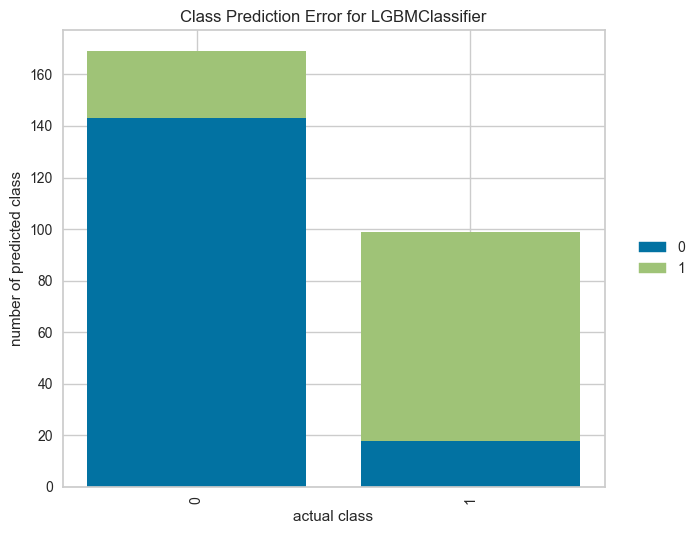

In [18]:
# tune_lightgb_acc consigue
# 0.64 (Accuracy) y 0.88 (AUC)
plot_model(tune_lightgbm_acc, plot = 'error')

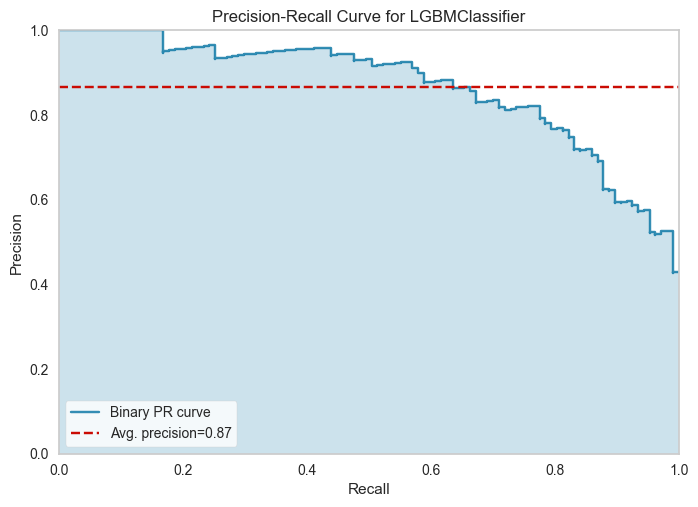

In [19]:
plot_model(tune_lightgbm_acc, plot = 'pr')

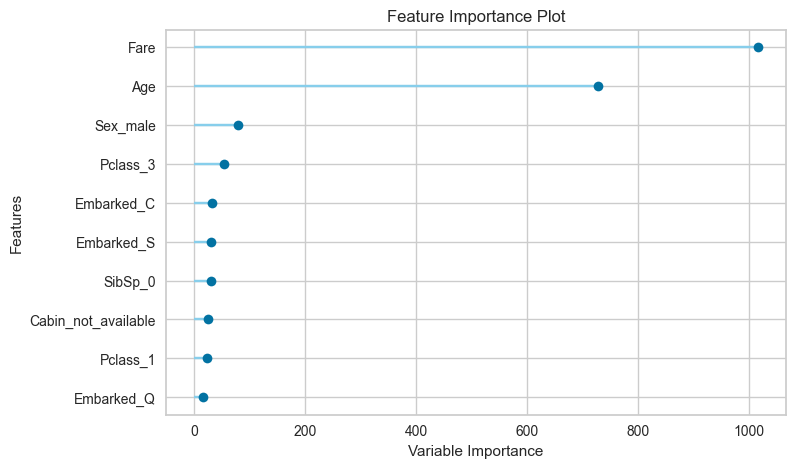

In [20]:
plot_model(tune_lightgbm_acc, plot = 'feature')

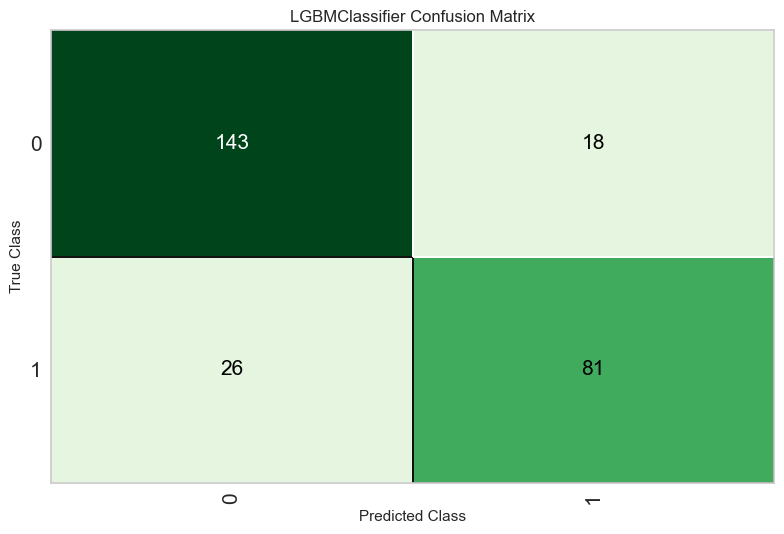

In [21]:
plot_model(tune_lightgbm_acc, plot = 'confusion_matrix')

### 1.9.- Step 8: evaluate_model() para el mejor <a class="anchor" id="109-evaluate-model"></a>

In [22]:
evaluate_model(tune_lightgbm_acc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 1.10.- Step 9: Nos vamos a test.csv <a class="anchor" id="110-test"></a>

In [23]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1.11.- Step 10: Hacemos predicciones con el mejor <a class="anchor" id="111-predicciones"></a>

In [24]:
predicciones = predict_model(tune_lightgbm_acc, data=test)
predicciones

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8813
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.8548
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9315
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.7571
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.8303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.9165
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9780
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9917
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.9165


In [25]:
predicciones_submission = predicciones[["PassengerId", "Label"]]
predicciones_submission.head()

,PassengerId,Label
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### 1.12.- Step 11: Submissions <a class="anchor" id="112-submissions"></a>

In [26]:
submission = pd.read_csv("gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [27]:
submission["PassengerId"] = predicciones_submission["PassengerId"]
submission["Survived"] = predicciones_submission["Label"]
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### 1.13.- Step 12: Creo el archivo csv para Kaggle <a class="anchor" id="113-kaggle"></a>

In [28]:
# Guardo el archivo en una ruta donde lo pueda tener localizado
# (en este caso, en la misma carpeta que el notebook)
submission.to_csv("pbd3_titanic_pycaret.csv", index=False)

## 2.- Opinion respecto al AutoML <a class="anchor" id="2-automl"></a>

### 2.1.- ¿Te costó esfuerzo aprender el presente tema? <a class="anchor" id="21-esfuerzo"></a>

El esfuerzo que he tenido que emplear para aprender este tema, no ha sido tan grande como los anteriores temas que se dieron en la asignatura de Fundamentos de BigData. Dado que muchos de los conceptos quedaron claros, simplemente en este es ir un paso más por delante.

### 2.2.- ¿Qué te ha llamado la atención de PyCaret? <a class="anchor" id="22-pycaret"></a>

PyCaret, me ha llamado la atención porque permite trabajar rápidamente con diferentes modelos y no es necesario importarlos todos como cuando se trabaja con scikit-learn. Además, permite realizar un análisis de los datos de forma rápida y sencilla e incorpora un conjunto de herramientas para la visualización de los datos y la evaluación de los modelos que facilitan mucho el trabajo.

### 2.3.- ¿Notas que es más simple haciéndolo así que como se hizo en Fundamentos de Big Data? Si opinas diferente la respuesta no es correcta/incorrecta, siempre y cuando argumentes tu respuesta. <a class="anchor" id="23-simple"></a>

Si, es mucho más sencillo porque la ventaja de PyCaret que te permite trabajar con todos los modelos, anteriormente había que hacer el setup de cada modelo. Además PyCaret tambien asigna automáticamente el set de entrenamiento y el set de prueba en caso de trabajar con un tran.csv, en cambio en Fundamentos de Big Data, se tenía que hacer el split de los datos manualmente utilizando scikit-learn.

Tambien considero que es necesario ver como se hace de manera más manual para entender que ocurre por debajo de la capa de PyCaret.

### 2.4.- Busca más herramientas AutoML que existan y enumera alguna (simplemente queremos que te familiarices con ello, nada más). <a class="anchor" id="24-otros"></a>

Algunas herramientas AutoML que he encontrado son:
- AutoKeras
- AutoGluon
- Auto-Sklearn
- H2O AutoML
- TPOT
- MLBox

## 3.- La curva ROC y el AUC <a class="anchor" id="3-roc-auc"></a>
Hemos mencionado un parámetro llamado AUC.
Haz un pequeño resumen con información que encuentres en Internet acerca de AUC y la curva ROC.
Puedes añadir la fuente donde obtuviste la información.
No es relevante todavía pero, estaría bien si lees algo al respecto.
Si te cuesta entenderlo, puedes, sin problema comentarlo.
(Habíamos comentado que se explicará en asignaturas sucesivas, pero si aprendes algo al respecto ahora te vendrá bien para entender un poco mejor el tema).

### 3.1.- ¿Qué es la curva ROC? <a class="anchor" id="31-roc"></a>
La curva ROC (Receiver Operating Characteristic) es una curva que nos permite visualizar el rendimiento de un modelo de clasificación binaria. Esta curva nos permite comparar los modelos de clasificación binaria, y nos permite ver que modelo es mejor que otro.
Se genera calculando y trazando la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación. La tasa de verdaderos positivos (TPR), o sensibilidad, se define como: TPR = TP / (TP + FN). La tasa de falsos positivos (FPR), o especificidad se define como: FPR = 1 - Especifidad = FP / (FP + TN).

Fuente: [https://polmartisanahuja.com/entendiendo-la-curva-roc-y-el-auc-dos-medidas-del-rendimiento-de-un-clasificador-binario-que-van-de-la-mano/](https://polmartisanahuja.com/entendiendo-la-curva-roc-y-el-auc-dos-medidas-del-rendimiento-de-un-clasificador-binario-que-van-de-la-mano/)

### 3.2.- ¿Qué es el AUC? <a class="anchor" id="32-auc"></a>
El área bajo la curva ROC (AUC, area under the curve ROC) es una medida de la capacidad de un modelo de clasificación binaria para distinguir entre clases. El AUC es un valor entre 0 y 1, donde 0.5 es el valor aleatorio y 1 es el valor perfecto. Un modelo con un AUC de 0.7 es mejor que un modelo con un AUC de 0.6.

Fuente: [https://aprendeia.com/curvas-roc-y-area-bajo-la-curva-auc-machine-learning/](https://aprendeia.com/curvas-roc-y-area-bajo-la-curva-auc-machine-learning/)

## 4.- Confusion Matrix o Matríz de Confusión <a class="anchor" id="4-confusion-matrix"></a>
Hemos usado la Confusion Matrix en esta lección, pero no hemos explicado mucho,
Haz un pequeño resumen con información que encuentres en Internet acerca de esto.
No es relevante todavía pero, estaría bien si lees algo al respecto.
Si te parece complicado, o no lo entiendes puedes comentarlo.

La matriz de confusión es una tabla que nos permite visualizar el rendimiento de un modelo de clasificación binaria. Esta tabla nos permite comparar los modelos de clasificación binaria, y nos permite ver que modelo es mejor que otro. La matriz de confusión nos muestra la cantidad de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) que ha predicho nuestro modelo.

![imagen](https://www.juanbarrios.com/wp-content/uploads/2019/07/MATRIZ-CONFUSION-400x358.png)

- **Verdadero positivo**: El valor real es positivo y la prueba predijo tambien que era positivo. 
- **Verdadero negativo**: El valor real  es negativo y la prueba predijo tambien que el resultado era negativo.
- **Falso negativo**: El valor real es positivo, y la prueba predijo que el resultado es negativo.
- **Falso positivo**: El valor real es negativo, y la prueba predijo que el resultado es positivo.

Fuente: [https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n](https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n)
<br>Fuente: [https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/](https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/)

## 5.- Envía tu predicción a Kaggle <a class="anchor" id="5-resultados-kaggle"></a>
Envía tu predicción a Kaggle y adjunta un pantallazo con tu resultado. 
Formato: .png o cualquier formato compatible con Moodle.

![prediccion_kaggle.png](prediccion_kaggle.png)

Como podemos observar, tras esta última predicción utilizando PyCaret hemos aumentado un poco la puntuación en Kaggle, pasando de 0.74162 a 0.76315.